https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
https://youtu.be/NEaUSP4YerM?t=641
https://youtu.be/GBUEjkpoxXc?list=PLJV_el3uVTsPy9oCRY30oBPNLCo89yu49&t=1441

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()



Using TensorFlow backend.


In [2]:

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape,)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
X = x_train / 255.0
y = y_train

In [4]:
X = X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X.shape

(60000, 784)

In [5]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [7]:
df.shape

(60000, 785)

In [10]:
import numpy as np
rndperm = np.random.permutation(df.shape[0])
rndperm

array([50028, 21852, 39640, ..., 32847, 17151, 31311])

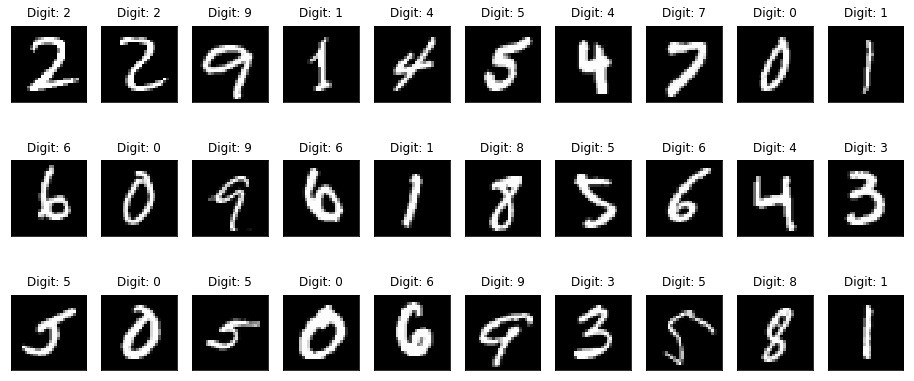

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
df[feat_cols].values.shape

(60000, 784)

# pca

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)


In [14]:
pca_result.shape

(60000, 3)

In [15]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

In [16]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0.486024,-1.226198,-0.096061
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,3.967526,-1.156291,2.338586
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.203330,1.537943,-0.739251
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.133833,-2.381264,1.073198
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,-1.501004,2.864914,0.064102
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,0.723404,0.867976,2.319031
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.849079,-0.615658,-0.973302
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3,2.013127,-1.218698,-0.408135
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.407482,-0.319777,-0.523237
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-1.195022,1.825934,2.715194


In [17]:
pca.explained_variance_ratio_

array([0.09704664, 0.07095924, 0.06169089])

In [123]:
df_select = df.loc[rndperm[:3000],:]
df_select

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three
50028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-0.026585,-2.946188,0.102060
21852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2,-1.510443,-3.432666,-2.105147
39640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9,1.561695,2.565050,-2.414524
16418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-2.814982,-1.033882,-0.330694
41173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-1.368245,0.452038,1.890769
43289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5,0.316208,-1.437499,1.934033
48646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,-0.734198,2.353594,-2.506061
56017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7,0.839388,1.248146,1.865470
38055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.877256,-0.256358,1.523512
11558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,-3.617694,-0.726977,-0.550153


In [98]:

groups = list(df_select.label.value_counts().index)
groups.sort()
groups

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

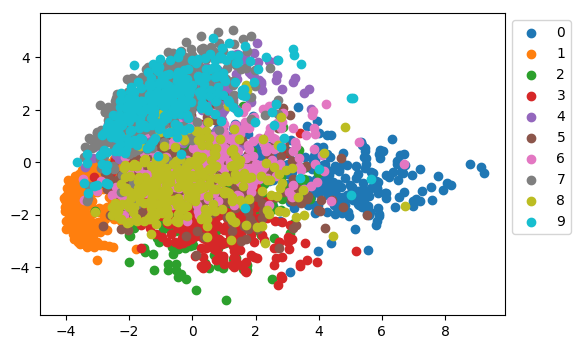

In [119]:
plt.figure(figsize=(6, 4),dpi= 100)

for group in groups:
    df_dummy = df_select[df_select.label==group]
    x = df_dummy['pca-one'].values
    y = df_dummy['pca-two'].values
    color = 'C'+group
    plt.scatter(x, y, c=color, label=group)
    
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# t-sne

In [120]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform( df.loc[ rndperm[:n_sne],feat_cols ].values )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.367s...
[t-SNE] Computed neighbors for 7000 samples in 58.772s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.245901
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.154831
[t-SNE] KL divergence after 300 iterations: 2.410760


In [121]:
tsne_results.shape

(7000, 2)

In [125]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel780,pixel781,pixel782,pixel783,label,pca-one,pca-two,pca-three,x-tsne,y-tsne
50028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,-0.026585,-2.946188,0.102060,6.169563,-4.720455
21852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,-1.510443,-3.432666,-2.105147,6.198289,-3.635897
39640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,1.561695,2.565050,-2.414524,-4.939782,7.797379
16418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,-2.814982,-1.033882,-0.330694,3.840183,1.275671
41173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,-1.368245,0.452038,1.890769,5.095181,4.173425
43289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5,0.316208,-1.437499,1.934033,-1.789660,-0.318524
48646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,-0.734198,2.353594,-2.506061,-3.528165,4.911219
56017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7,0.839388,1.248146,1.865470,7.647869,7.441757
38055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,-0.877256,-0.256358,1.523512,-5.669052,-3.284468
11558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,-3.617694,-0.726977,-0.550153,5.050352,2.301567


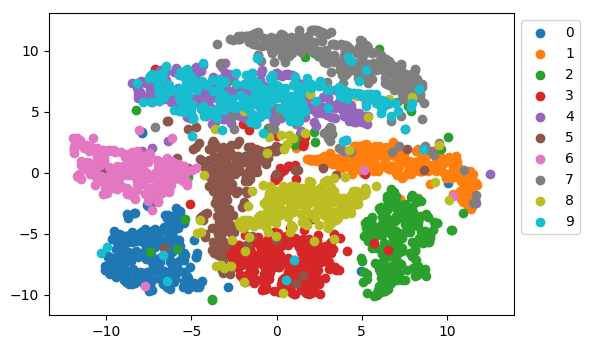

In [126]:
df_select = df_tsne.loc[rndperm[:3000],:]
df_select
groups = list(df_select.label.value_counts().index)
groups.sort()
groups

plt.figure(figsize=(6, 4),dpi= 100)

for group in groups:
    df_dummy = df_select[df_select.label==group]
    x = df_dummy['x-tsne'].values
    y = df_dummy['y-tsne'].values
    color = 'C'+group
    plt.scatter(x, y, c=color, label=group)
    
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# pca + t-sne

In [128]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

In [130]:
pca_result_50.shape

(60000, 50)

In [129]:
np.sum(pca_50.explained_variance_ratio_)

0.8246337209855643

In [ ]:

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(  pca_50[:n_sne] )

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.248s...


In [132]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
df_tsne

array([[ 0.48601015, -1.22617358, -0.09613354, ..., -0.29144296,
         0.11466445,  0.03267928],
       [ 3.96752304, -1.15630211,  2.33858651, ..., -0.67548043,
         0.44026235, -0.29130191],
       [-0.2033318 ,  1.53793393, -0.73925392, ...,  0.14663027,
        -0.62223902, -0.20187273],
       ...,
       [-0.69824882,  0.62775769, -1.01024738, ...,  0.01331596,
         0.42156408,  0.64897141],
       [ 0.51218067, -0.02192916,  2.01513205, ...,  0.06448672,
         0.09681309, -0.12917381],
       [-0.68014099, -0.09693648,  2.18046625, ..., -0.35365145,
         0.74071359, -0.03898335]])